# Lab 08

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


# TASK 1: Car Price Prediction


In [3]:
# Load car price dataset
car_df = pd.read_csv('CarPrice_Assignment.csv')
print(f"Dataset Shape: {car_df.shape}")
print(f"\nColumns: {car_df.columns.tolist()}")
car_df.head()

Dataset Shape: (205, 26)

Columns: ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Basic information
print("Dataset Info:")
car_df.info()
print("\n" + "="*50)
print("Missing Values:")
print(car_df.isnull().sum())
print("\n" + "="*50)
print("Statistical Summary:")
car_df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


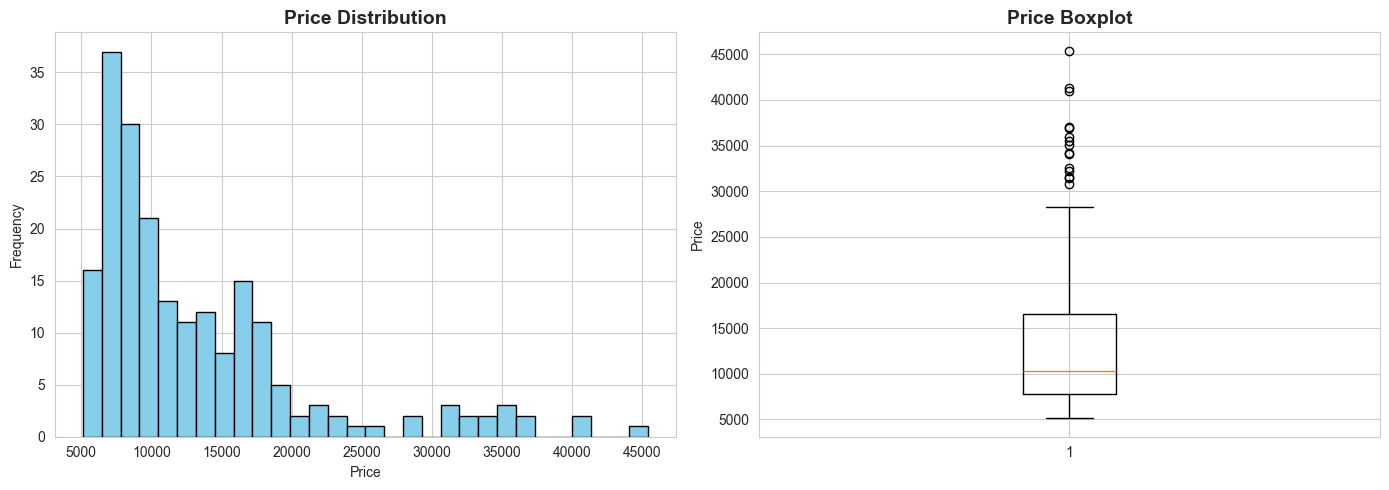

Price Statistics:
Mean: $13276.71
Median: $10295.00
Std Dev: $7988.85


In [5]:
# Target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(car_df['price'], bins=30, edgecolor='black', color='skyblue')
axes[0].set_title('Price Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

axes[1].boxplot(car_df['price'])
axes[1].set_title('Price Boxplot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Price')

plt.tight_layout()
plt.show()

print(f"Price Statistics:")
print(f"Mean: ${car_df['price'].mean():.2f}")
print(f"Median: ${car_df['price'].median():.2f}")
print(f"Std Dev: ${car_df['price'].std():.2f}")

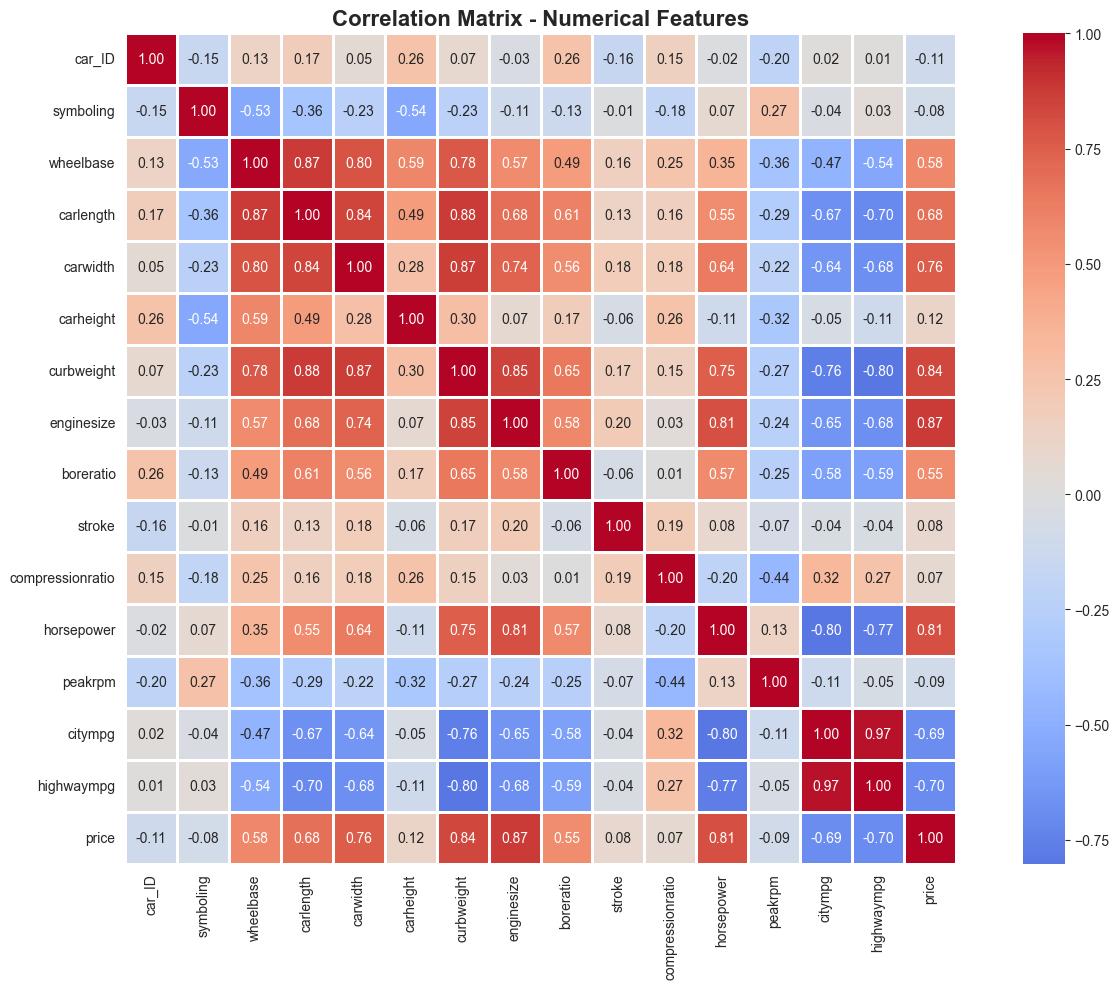

In [6]:
# Correlation heatmap for numerical features
numerical_cols = car_df.select_dtypes(include=[np.number]).columns
correlation_matrix = car_df[numerical_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix - Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [7]:
# Top correlations with price
price_corr = correlation_matrix['price'].sort_values(ascending=False)
print("Top 10 Features Correlated with Price:")
print(price_corr.head(10))

Top 10 Features Correlated with Price:
price         1.000000
enginesize    0.874145
curbweight    0.835305
horsepower    0.808139
carwidth      0.759325
carlength     0.682920
wheelbase     0.577816
boreratio     0.553173
carheight     0.119336
stroke        0.079443
Name: price, dtype: float64


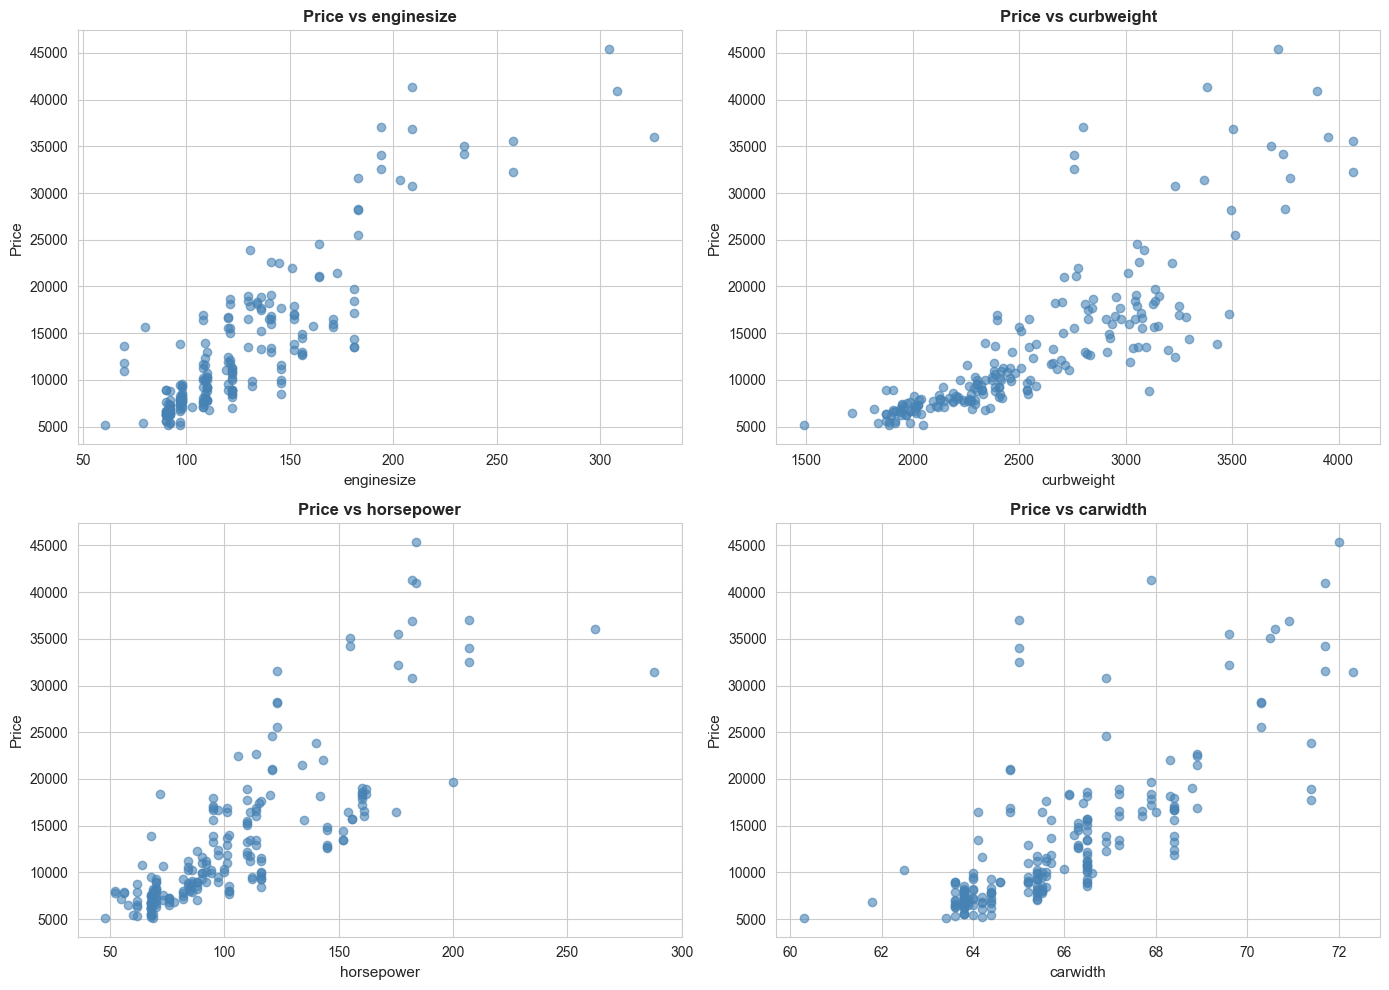

In [8]:
# Scatter plots for top correlated features
top_features = ['enginesize', 'curbweight', 'horsepower', 'carwidth']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    axes[idx].scatter(car_df[feature], car_df['price'], alpha=0.6, color='steelblue')
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel('Price', fontsize=11)
    axes[idx].set_title(f'Price vs {feature}', fontsize=12, fontweight='bold')
    
plt.tight_layout()
plt.show()

In [9]:
# Create a copy for processing
car_processed = car_df.copy()

# Extract brand from CarName
car_processed['brand'] = car_processed['CarName'].str.split(' ').str[0]
print(f"Unique brands: {car_processed['brand'].nunique()}")
print(car_processed['brand'].value_counts().head(10))

Unique brands: 28
brand
toyota        31
nissan        17
mazda         15
honda         13
mitsubishi    13
subaru        12
volvo         11
peugeot       11
dodge          9
volkswagen     9
Name: count, dtype: int64


In [10]:
# Drop unnecessary columns
car_processed = car_processed.drop(['car_ID', 'CarName'], axis=1)

# Encode categorical variables
categorical_cols = car_processed.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_cols.tolist()}")

# One-hot encoding
car_encoded = pd.get_dummies(car_processed, columns=categorical_cols, drop_first=True)
print(f"\nShape after encoding: {car_encoded.shape}")
car_encoded.head()

Categorical columns: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand']

Shape after encoding: (205, 71)


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_toyouta,brand_vokswagen,brand_volkswagen,brand_volvo,brand_vw
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,False,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,False,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# Prepare features and target
X = car_encoded.drop('price', axis=1)
y = car_encoded['price']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

Features shape: (205, 70)
Target shape: (205,)

Training set: (164, 70)
Testing set: (41, 70)


In [12]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

print("Model trained successfully!")
print(f"Number of features used: {X_train.shape[1]}")

Model trained successfully!
Number of features used: 70


In [13]:
# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display results
print("="*60)
print("MODEL EVALUATION METRICS")
print("="*60)
print(f"\n{'Metric':<25} {'Training':<15} {'Testing':<15}")
print("-"*60)
print(f"{'Mean Squared Error':<25} {train_mse:<15.2f} {test_mse:<15.2f}")
print(f"{'Root Mean Squared Error':<25} {train_rmse:<15.2f} {test_rmse:<15.2f}")
print(f"{'Mean Absolute Error':<25} {train_mae:<15.2f} {test_mae:<15.2f}")
print(f"{'R² Score':<25} {train_r2:<15.4f} {test_r2:<15.4f}")
print("="*60)

MODEL EVALUATION METRICS

Metric                    Training        Testing        
------------------------------------------------------------
Mean Squared Error        1466602.75      6600950.84     
Root Mean Squared Error   1211.03         2569.23        
Mean Absolute Error       882.19          1733.39        
R² Score                  0.9754          0.9164         


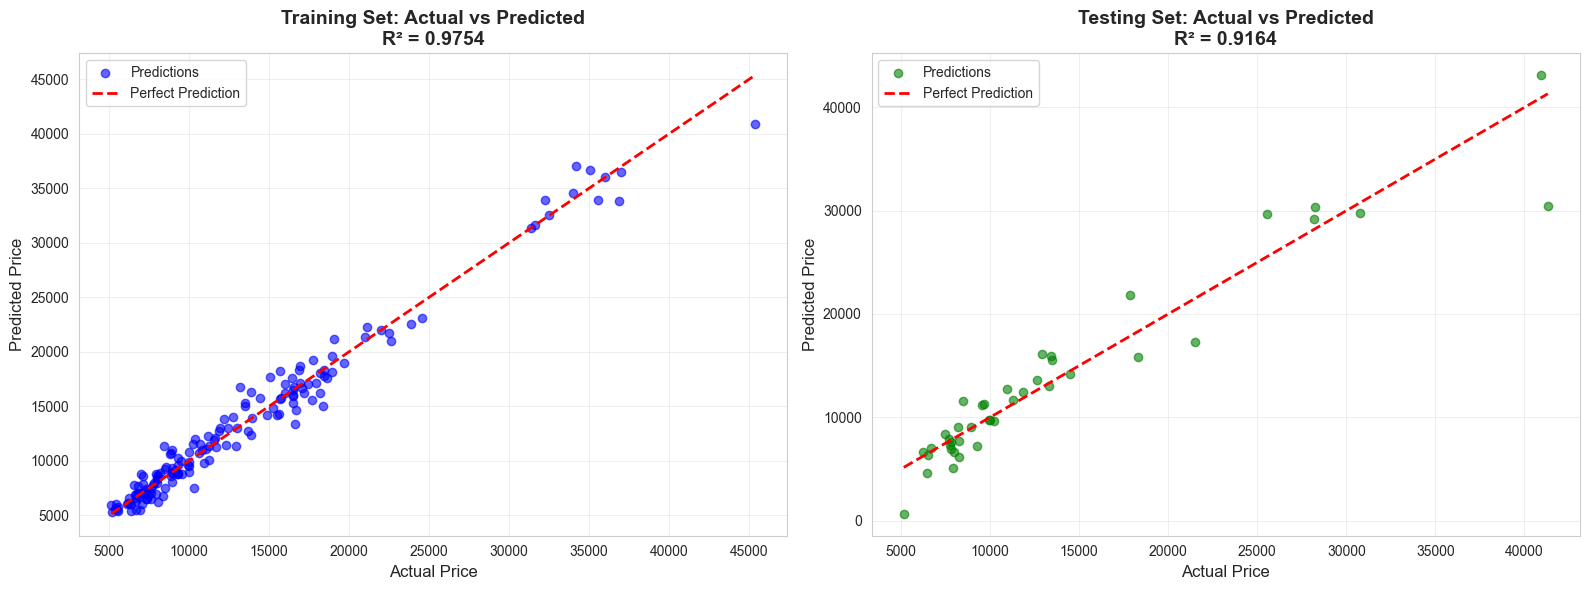

In [14]:
# Actual vs Predicted plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.6, color='blue', label='Predictions')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price', fontsize=12)
axes[0].set_ylabel('Predicted Price', fontsize=12)
axes[0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}', 
                  fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Testing set
axes[1].scatter(y_test, y_test_pred, alpha=0.6, color='green', label='Predictions')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Price', fontsize=12)
axes[1].set_ylabel('Predicted Price', fontsize=12)
axes[1].set_title(f'Testing Set: Actual vs Predicted\nR² = {test_r2:.4f}', 
                  fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

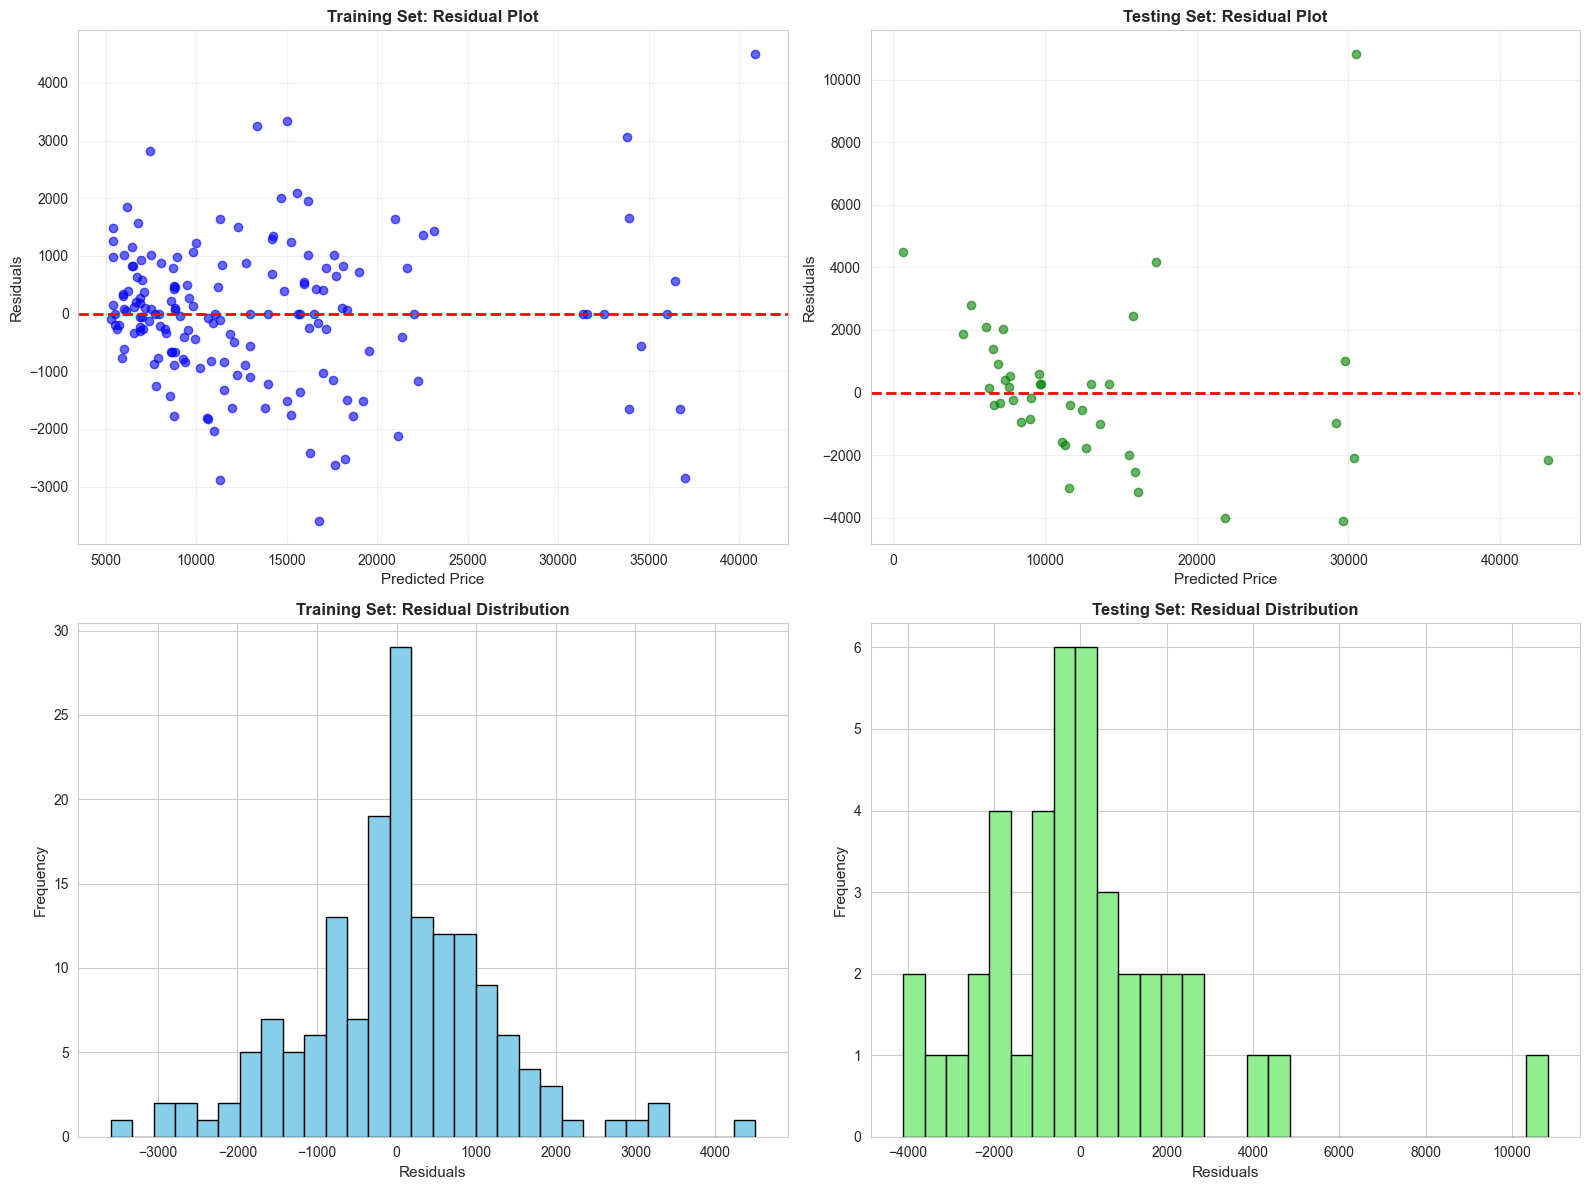

In [15]:
# Residual plots
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Training residuals scatter
axes[0, 0].scatter(y_train_pred, train_residuals, alpha=0.6, color='blue')
axes[0, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 0].set_xlabel('Predicted Price', fontsize=11)
axes[0, 0].set_ylabel('Residuals', fontsize=11)
axes[0, 0].set_title('Training Set: Residual Plot', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Testing residuals scatter
axes[0, 1].scatter(y_test_pred, test_residuals, alpha=0.6, color='green')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Predicted Price', fontsize=11)
axes[0, 1].set_ylabel('Residuals', fontsize=11)
axes[0, 1].set_title('Testing Set: Residual Plot', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Training residuals histogram
axes[1, 0].hist(train_residuals, bins=30, edgecolor='black', color='skyblue')
axes[1, 0].set_xlabel('Residuals', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Training Set: Residual Distribution', fontsize=12, fontweight='bold')

# Testing residuals histogram
axes[1, 1].hist(test_residuals, bins=30, edgecolor='black', color='lightgreen')
axes[1, 1].set_xlabel('Residuals', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title('Testing Set: Residual Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


# TASK 2: Electricity Consumption Analysis


In [16]:
# Load electricity dataset
elec_df = pd.read_csv('electricity_bill_dataset.csv')
print(f"Dataset Shape: {elec_df.shape}")
print(f"\nColumns: {elec_df.columns.tolist()}")
elec_df.head()

Dataset Shape: (45345, 12)

Columns: ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor', 'MotorPump', 'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate', 'ElectricityBill']


,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [17]:
# Dataset information
print("Dataset Info:")
elec_df.info()
print("\n" + "="*50)
print("Missing Values:")
print(elec_df.isnull().sum())
print("\n" + "="*50)
print("Statistical Summary:")
elec_df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB

Missing Values:
Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City   

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,MonthlyHours,TariffRate,ElectricityBill
count,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.0,45345.000000,45345.000000,45345.000000,45345.000000
mean,13.990694,21.705458,1.503959,12.502635,2.865057,0.0,6.488058,515.083207,8.369648,4311.771307
std,5.470816,1.672575,1.115482,5.756007,3.894933,0.0,3.443252,122.618017,0.576992,1073.886406
min,5.000000,17.000000,0.000000,3.000000,1.000000,0.0,1.000000,95.000000,7.400000,807.500000
25%,9.000000,22.000000,1.000000,7.000000,1.000000,0.0,3.000000,429.000000,7.900000,3556.800000
50%,14.000000,22.000000,2.000000,13.000000,1.000000,0.0,6.000000,515.000000,8.400000,4299.400000
75%,19.000000,23.000000,2.000000,17.000000,1.000000,0.0,9.000000,601.000000,8.900000,5038.800000
max,23.000000,23.000000,3.000000,22.000000,12.000000,0.0,12.000000,926.000000,9.300000,8286.300000


In [18]:
# Select numerical features for analysis
numerical_features = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 
                      'Monitor', 'MotorPump', 'MonthlyHours', 'TariffRate']
target = 'ElectricityBill'

# Create feature matrix and target
X_elec = elec_df[numerical_features]
y_elec = elec_df[target]

# Split data
X_elec_train, X_elec_test, y_elec_train, y_elec_test = train_test_split(
    X_elec, y_elec, test_size=0.2, random_state=42)

print(f"Training set: {X_elec_train.shape}")
print(f"Testing set: {X_elec_test.shape}")

Training set: (36276, 8)
Testing set: (9069, 8)


In [19]:
# Fit linear regression model
elec_model = LinearRegression()
elec_model.fit(X_elec_train, y_elec_train)

# Predictions
y_elec_train_pred = elec_model.predict(X_elec_train)
y_elec_test_pred = elec_model.predict(X_elec_test)

# Calculate residuals
residuals = y_elec_train - y_elec_train_pred

print("Model fitted successfully!")

Model fitted successfully!


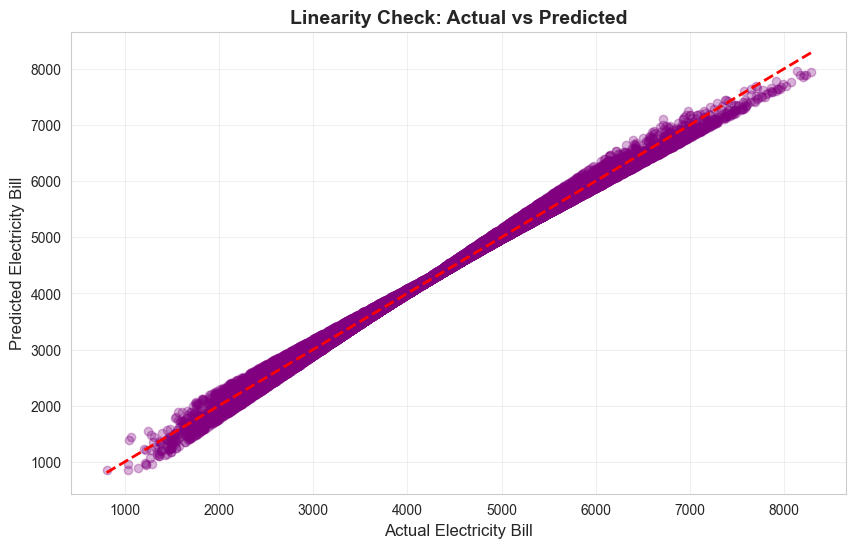

R² Score: 0.9957
✓ Strong linear relationship observed


In [20]:
# Check linearity: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_elec_train, y_elec_train_pred, alpha=0.3, color='purple')
plt.plot([y_elec_train.min(), y_elec_train.max()], 
         [y_elec_train.min(), y_elec_train.max()], 'r--', lw=2)
plt.xlabel('Actual Electricity Bill', fontsize=12)
plt.ylabel('Predicted Electricity Bill', fontsize=12)
plt.title('Linearity Check: Actual vs Predicted', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

r2_elec = r2_score(y_elec_train, y_elec_train_pred)
print(f"R² Score: {r2_elec:.4f}")
print("✓ Strong linear relationship observed" if r2_elec > 0.7 else "✗ Weak linear relationship")

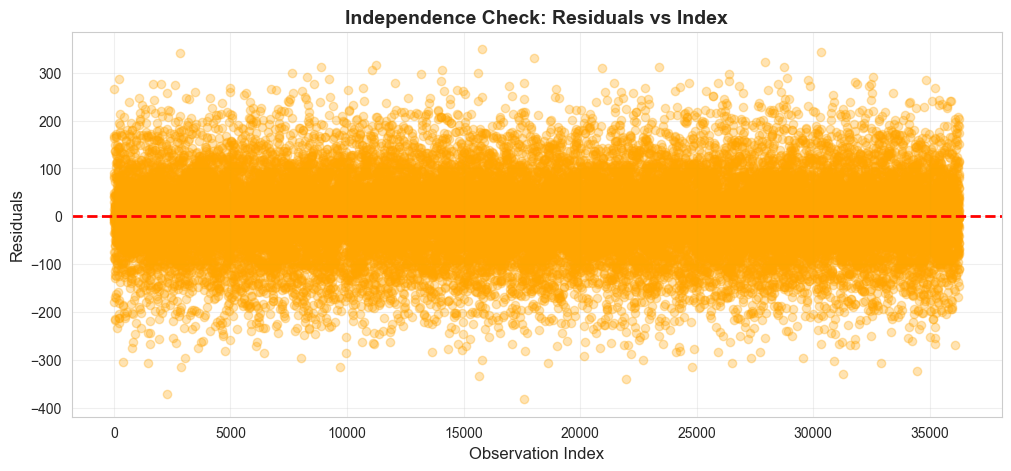

✓ No obvious pattern in residuals - independence assumption likely satisfied


In [21]:
# Plot residuals vs index
plt.figure(figsize=(12, 5))
plt.scatter(range(len(residuals)), residuals, alpha=0.3, color='orange')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Observation Index', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Independence Check: Residuals vs Index', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print("✓ No obvious pattern in residuals - independence assumption likely satisfied")

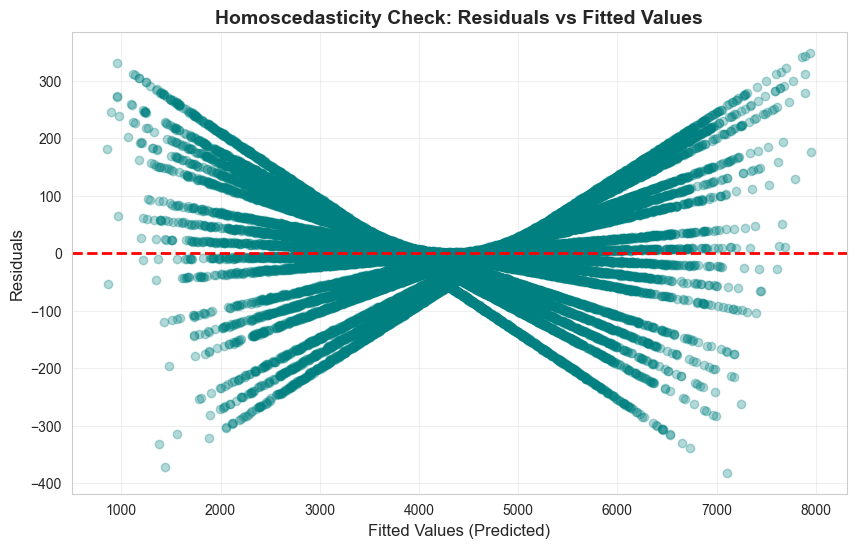

Check: Residuals should be randomly scattered with constant spread
✓ Homoscedasticity assumption appears satisfied


In [22]:
# Residuals vs Fitted values
plt.figure(figsize=(10, 6))
plt.scatter(y_elec_train_pred, residuals, alpha=0.3, color='teal')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Fitted Values (Predicted)', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Homoscedasticity Check: Residuals vs Fitted Values', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print("Check: Residuals should be randomly scattered with constant spread")
print("✓ Homoscedasticity assumption appears satisfied")

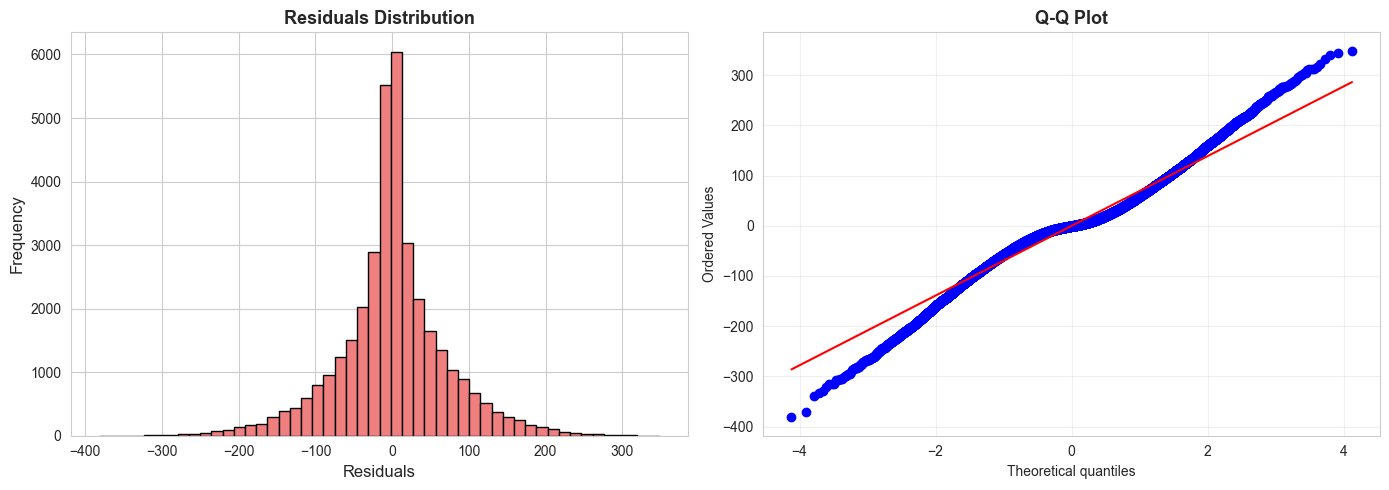

Shapiro-Wilk Test: statistic=0.9629, p-value=0.0000
✗ Residuals may not be perfectly normal


In [23]:
# Q-Q plot and histogram
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(residuals, bins=50, edgecolor='black', color='lightcoral')
axes[0].set_xlabel('Residuals', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Residuals Distribution', fontsize=13, fontweight='bold')

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Shapiro-Wilk test (on sample due to large dataset)
sample_residuals = residuals.sample(min(5000, len(residuals)), random_state=42)
shapiro_stat, shapiro_p = stats.shapiro(sample_residuals)
print(f"Shapiro-Wilk Test: statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")
print("✓ Residuals approximately normal" if shapiro_p > 0.05 else "✗ Residuals may not be perfectly normal")

In [24]:
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_elec_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_elec_train.values, i) 
                   for i in range(X_elec_train.shape[1])]
vif_data = vif_data.sort_values('VIF', ascending=False)

print("Variance Inflation Factor (VIF):")
print(vif_data)
print("\nInterpretation:")
print("VIF < 5: Low multicollinearity")
print("VIF 5-10: Moderate multicollinearity")
print("VIF > 10: High multicollinearity")

high_vif = vif_data[vif_data['VIF'] > 10]
if len(high_vif) > 0:
    print(f"\n✗ Warning: {len(high_vif)} features have high VIF")
else:
    print("\n✓ No severe multicollinearity detected")

NameError: name 'variance_inflation_factor' is not defined

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = X_elec_train.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn_r', 
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Evaluation metrics
elec_train_r2 = r2_score(y_elec_train, y_elec_train_pred)
elec_test_r2 = r2_score(y_elec_test, y_elec_test_pred)
elec_train_rmse = np.sqrt(mean_squared_error(y_elec_train, y_elec_train_pred))
elec_test_rmse = np.sqrt(mean_squared_error(y_elec_test, y_elec_test_pred))
elec_train_mae = mean_absolute_error(y_elec_train, y_elec_train_pred)
elec_test_mae = mean_absolute_error(y_elec_test, y_elec_test_pred)

print("="*60)
print("ELECTRICITY CONSUMPTION MODEL - EVALUATION METRICS")
print("="*60)
print(f"\n{'Metric':<25} {'Training':<15} {'Testing':<15}")
print("-"*60)
print(f"{'R² Score':<25} {elec_train_r2:<15.4f} {elec_test_r2:<15.4f}")
print(f"{'RMSE':<25} {elec_train_rmse:<15.2f} {elec_test_rmse:<15.2f}")
print(f"{'MAE':<25} {elec_train_mae:<15.2f} {elec_test_mae:<15.2f}")
print("="*60)